<a href="https://colab.research.google.com/github/dinasoffa/Numerical-Optimization/blob/main/Mmentum%26NAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# develop a Python program that is able to implement the accelerated gradient descent methods (Momentum and NAG) in order to achieve the linear regression of a set of datapoints.
### notce: will apply these algorithm to single variable LR, Only batch variant.

### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

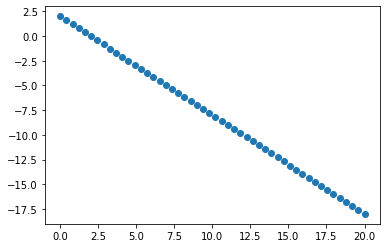

In [4]:
plt.scatter(X,y)

In [5]:
def Momentum(X ,y , alpha,gamma ,epoch):
    theta_0 , theta_1 ,v_0,v_1= 0,0,0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    ch=0
    for i in range(epoch):
        print(f"\n******* Iteration {i} *******")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)

        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        if i >20:
            if abs(loss[-1] -loss[-2]) <= 0.001:
                ch=1
    
        if G_norm <= 0.001 or ch == 1:
            break
        v_0=(v_0*gamma)+ alpha * d_theta_0 
        v_1=(v_1*gamma)+ alpha * d_theta_1  

        theta_0 = theta_0 -v_0 
        theta_1 = theta_1 - v_1
        
       
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()    
        
    return Theta_0, Theta_1 , H ,  loss,i

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [6]:
Theta_0, Theta_1 , H ,  loss,i=Momentum(X,y,0.0005,0.5,300)


******* Iteration 0 *******
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.05734693877551021

*****

In [7]:
r2_score(y,H[-1])

0.9687892837396442

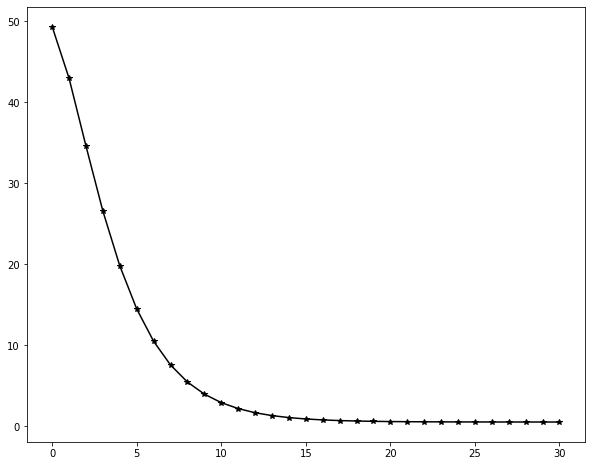

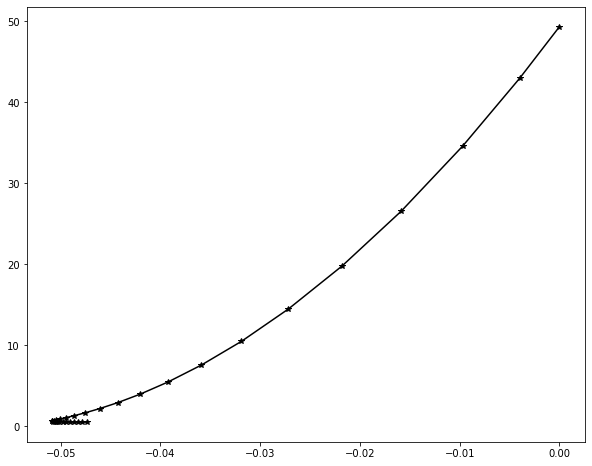

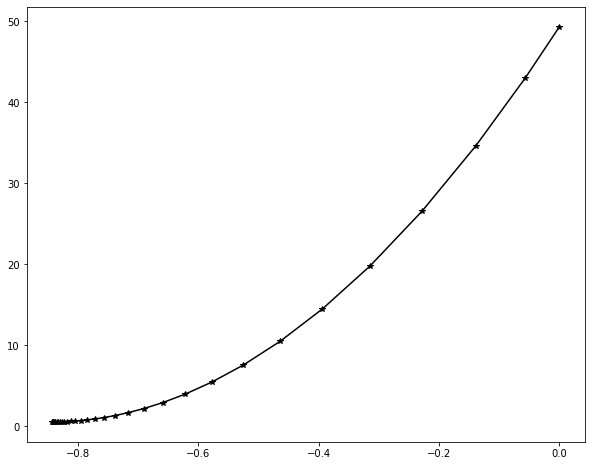

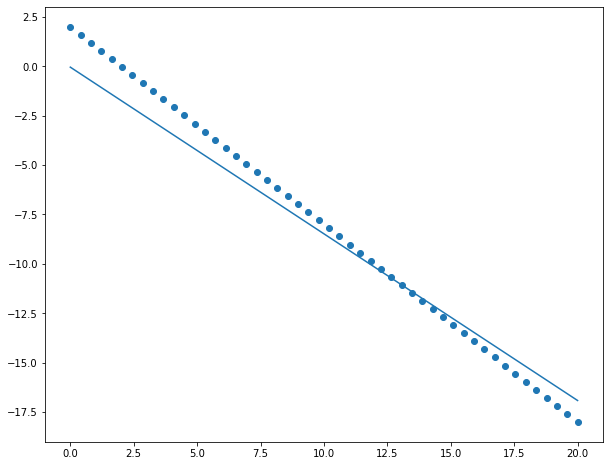

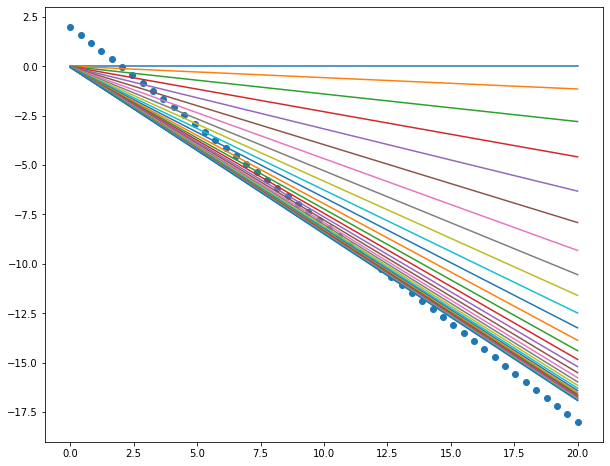

In [8]:
plt.figure(figsize=(10,8))
plt.plot(loss, marker='*', color="black")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0, loss, marker='*', color="black")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1, loss, marker='*', color="black")
plt.show
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [9]:
Theta_0, Theta_1 , H ,  loss,i=Momentum(X,y,0.0005,0.9,300)


******* Iteration 0 *******
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.05734693877551021

*****

In [10]:
r2_score(y,H[-1])

0.973589591111118

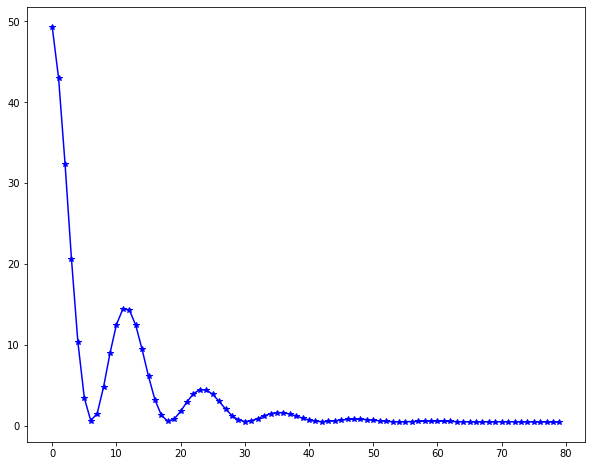

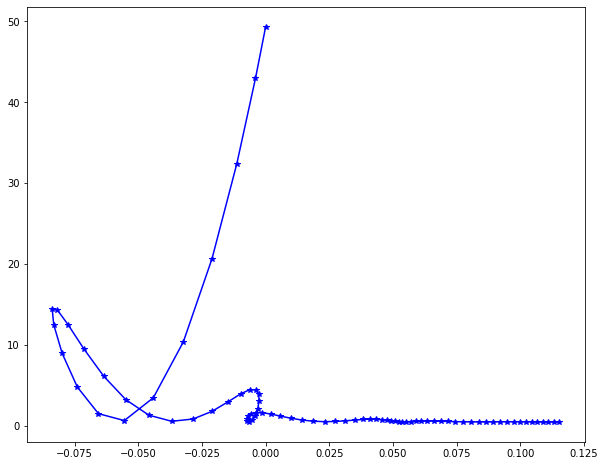

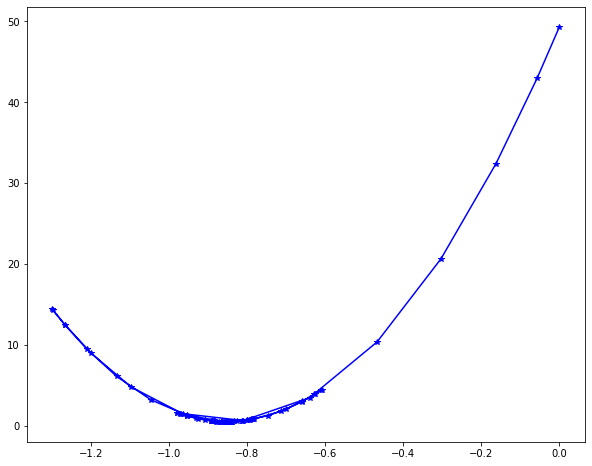

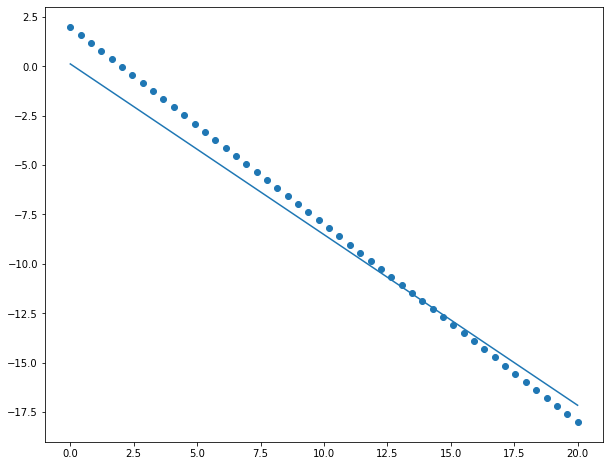

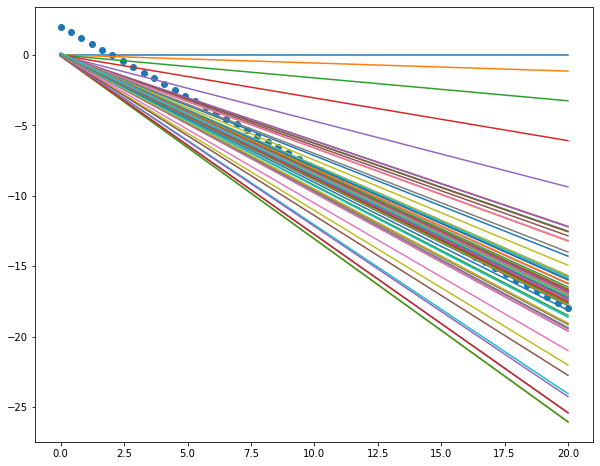

In [11]:
plt.figure(figsize=(10,8))
plt.plot(loss, marker='*', color="blue")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0, loss, marker='*', color="blue")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1, loss, marker='*', color="blue")
plt.show
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)

# Update Batch GD for one variable  implementation to be NAG and check results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [12]:
def NAG(X ,y , alpha,gamma ,epoch):
    v_0,v_1= 0,0
    theta_0=0
    theta_1=0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    ch=0
    for i in range(epoch):
        print(f"\n******* Iteration {i} *******")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)

        h_x = theta_0+theta_1*X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        if i >20:
            if abs(loss[-1] -loss[-2]) <= 0.001:
                ch=1
    
        if G_norm <= 0.001 or ch == 1:
            break
        
        theta0_temp =theta_0 - (gamma * v_0)
        theta1_temp =theta_1 - (gamma * v_1)
        h_x_temp=theta0_temp+theta1_temp*X
        e_t=h_x_temp - y
        d_temp_0=(1/len(X))*sum(e_t)
        d_temp_1=(1/len(X))*sum(e_t*X)

      
        theta_0=theta0_temp-(alpha*d_temp_0)
        theta_1=theta1_temp-(alpha*d_temp_1)
        
        
        v_0=(v_0*gamma)+ (alpha * d_temp_0)
        v_1=(v_1*gamma)+ (alpha * d_temp_1)
        
        
        
         
        
        
       
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta0_temp)
    print("theta_1_Opt : " ,theta1_temp)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()    
        
    return Theta_0, Theta_1 , H ,  loss,i

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [13]:
Theta_0, Theta_1 , H ,  loss,i=NAG(X,y,0.0005,0.9,300)


******* Iteration 0 *******
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.05734693877551021

*****

In [14]:
r2_score(y,H[-1])

0.971103130756324

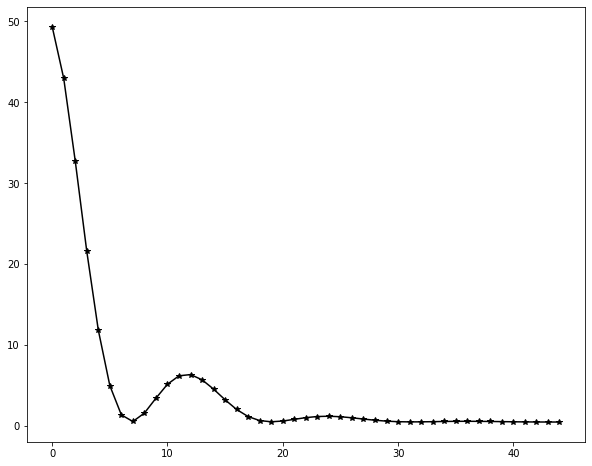

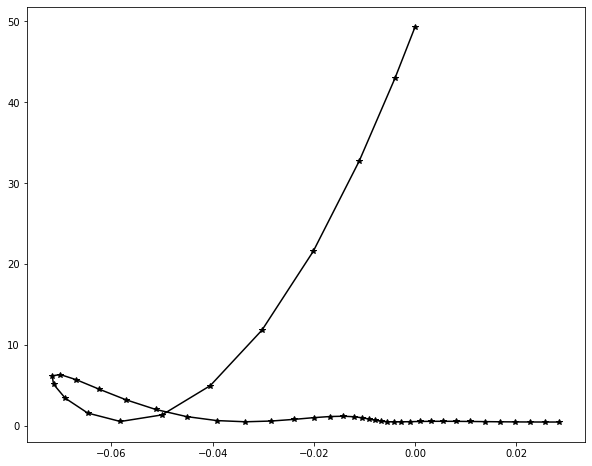

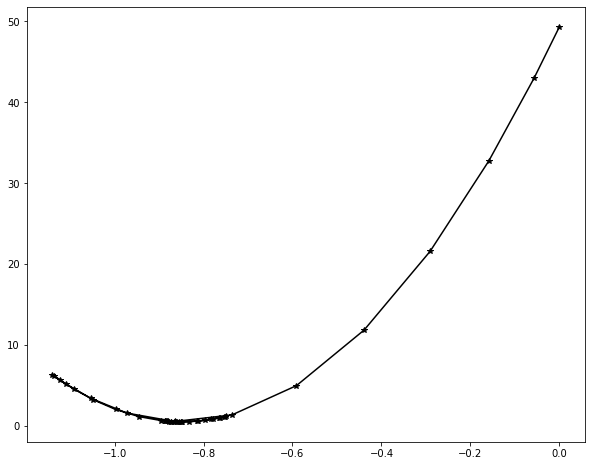

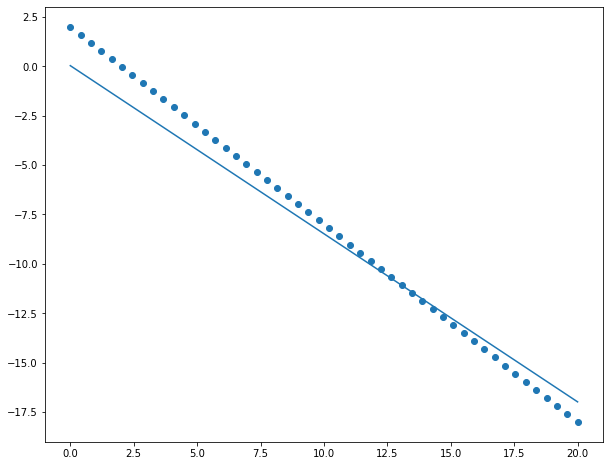

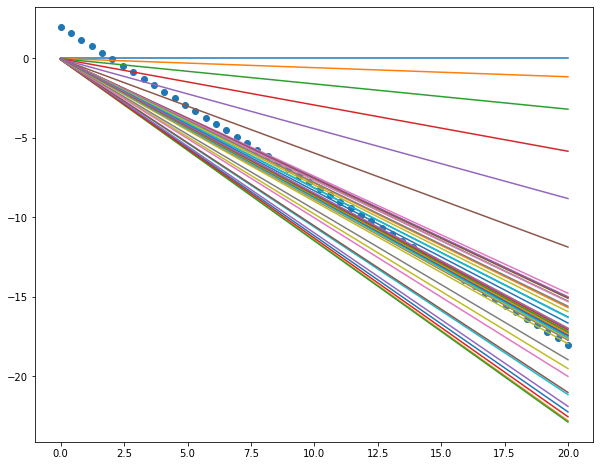

In [15]:
plt.figure(figsize=(10,8))
plt.plot(loss, marker='*', color="black")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0, loss, marker='*', color="black")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1, loss, marker='*', color="black")
plt.show
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)